# Lead Case Study

## Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Importing dataset
leads_data = pd.read_csv("leads.csv")

In [3]:
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries

## Step 2: Inspecting the Dataframe

In [4]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3: Cleaning the Data

In [8]:
# Check Null Values
leads_data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
perc = 40.0 ## Threshold for removing columns with more than 40% missing values 

In [10]:
min_count =  int(((100-perc)/100)*leads_data.shape[0] + 1)

In [11]:
leads_data.dropna( axis=1, thresh=min_count, inplace=True)

In [12]:
leads_data.shape #5 columns removed

(9240, 32)

In [13]:
# Check Null Values
leads_data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [14]:
# Removing missing values with less than 10%
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]

In [15]:
leads_data = leads_data[~np.isnan(leads_data['Page Views Per Visit'])]

In [16]:
# Check Null Values
leads_data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.318576
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.530045
Specialization                                   15.720092
How did you hear about X Education               24.167857
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Search                                            0.0000

In [17]:
leads_data.Country.value_counts(dropna=False)

India                   6492
NaN                     2324
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [18]:
# Majority are India (More than 90%) so let's delete the column as there is dominance of one category

In [19]:
leads_data.drop('Country', axis=1, inplace=True)

In [20]:
leads_data.City.value_counts(dropna=False)

Mumbai                         3179
Select                         2181
NaN                            1419
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
leads_data.City.fillna('Mumbai', inplace=True)

In [22]:
leads_data.Specialization.value_counts(dropna=False)

Select                               1873
NaN                                  1431
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Others')
leads_data['Specialization'] = leads_data['Specialization'].replace('Select','Others')
## Replace with 'Others' since no category is prominent

In [24]:
leads_data['Specialization'].value_counts(normalize=True)*100

Others                               36.295727
Finance Management                   10.567945
Human Resource Management             9.205756
Marketing Management                  9.051961
Operations Management                 5.492695
Business Administration               4.383170
IT Projects Management                4.020653
Supply Chain Management               3.800945
Banking, Investment And Insurance     3.680105
Travel and Tourism                    2.219049
Media and Advertising                 2.219049
International Business                1.933429
Healthcare Management                 1.724706
E-COMMERCE                            1.219378
Hospitality Management                1.219378
Retail Management                     1.098539
Rural and Agribusiness                0.801933
E-Business                            0.626167
Services Excellence                   0.439416
Name: Specialization, dtype: float64

In [25]:
# Let's club all Management under one category

leads_data['Specialization'] = leads_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                            'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management') 

In [26]:
leads_data['Specialization'].value_counts(normalize=True)*100

Management                           46.182577
Others                               36.295727
Business Administration               4.383170
Banking, Investment And Insurance     3.680105
Media and Advertising                 2.219049
Travel and Tourism                    2.219049
International Business                1.933429
E-COMMERCE                            1.219378
Rural and Agribusiness                0.801933
E-Business                            0.626167
Services Excellence                   0.439416
Name: Specialization, dtype: float64

In [27]:
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5502
NaN                     2683
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Majority is Unemployed so impute with that

In [29]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [30]:
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6399
NaN                          2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# Majority is Better Career Prospects hence let's drop the column

In [32]:
leads_data.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [33]:
leads_data['How did you hear about X Education'].value_counts(dropna=False)

Select                   4914
NaN                      2200
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [34]:
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace(np.nan, 'Others')
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace(['Select','Other'], 'Others')
## Replace with 'Others' since no category is prominent

In [35]:
leads_data['How did you hear about X Education'].value_counts(normalize=True)*100

Others                   80.193343
Online Search             8.876195
Word Of Mouth             3.822916
Student of SomeSchool     3.405471
Multiple Sources          1.669779
Advertisements            0.768977
Social Media              0.725036
Email                     0.285620
SMS                       0.252664
Name: How did you hear about X Education, dtype: float64

In [36]:
# Not much relevant information coming about of this column so let's drop this
leads_data.drop('How did you hear about X Education', axis=1, inplace=True)

In [37]:
leads_data['Tags'].value_counts(dropna=False)

NaN                                                  3333
Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [38]:
#replacing Nan values with "Not Specified"
leads_data['Tags'] = leads_data['Tags'].replace(np.nan,'Not Specified')

In [39]:
leads_data['Tags'].value_counts(normalize=True)*100

Not Specified                                        36.614303
Will revert after reading the email                  22.355267
Ringing                                              13.061628
Interested in other courses                           5.591563
Already a student                                     5.108206
Closed by Horizzon                                    3.306602
switched off                                          2.636493
Busy                                                  2.032297
Lost to EINS                                          1.900472
Not doing further education                           1.592881
Interested  in full time MBA                          1.274305
Graduation in progress                                1.219378
invalid number                                        0.911787
Diploma holder (Not Eligible)                         0.692080
wrong number given                                    0.516313
opp hangup                                            0

In [40]:
leads_data['Lead Profile'].value_counts(dropna=False)

Select                         4079
NaN                            2702
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [41]:
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace(np.nan,'Other')

In [42]:
leads_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [43]:
#replacing Nan Values and combining a few values
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan,'Others')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('Facebook','Social Media')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

In [44]:
leads_data['Lead Source'].value_counts(normalize=True)*100

Google              31.561024
Direct Traffic      27.935845
Olark Chat          19.257388
Organic Search      12.677139
Reference            4.866528
Welingak Website     1.417115
Referral Sites       1.373174
Others               0.527299
Social Media         0.362518
Live Chat            0.021971
Name: Lead Source, dtype: float64

In [45]:
# Check if Prospect ID and Lead Number have Unique Values. If yes, then we can drop them as well

In [46]:
sum(leads_data.duplicated(subset = 'Prospect ID')) == 0

True

In [47]:
sum(leads_data.duplicated(subset = 'Lead Number')) == 0

True

In [48]:
leads_data.drop(['Prospect ID', 'Lead Number'], axis =1, inplace=True)

In [49]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
leads_data.shape # Left with 27 columns

(9103, 27)

# Step 4: EDA

In [51]:
# Analyzing each categprical column against Converted

In [52]:
leads_data['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: Lead Origin, dtype: float64

In [53]:
leads_data['Lead Origin'] = leads_data['Lead Origin'].replace(['Lead Import','Lead Add Form'],'Others')

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

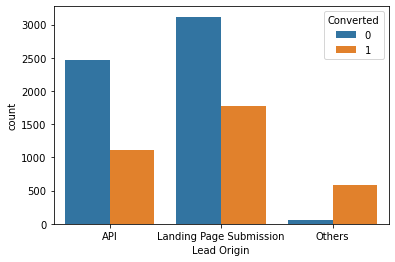

In [54]:
sns.countplot(leads_data['Lead Origin'], hue=leads_data['Converted'])

In [55]:
# Conversion ratio is higher for Landing Page Submission

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

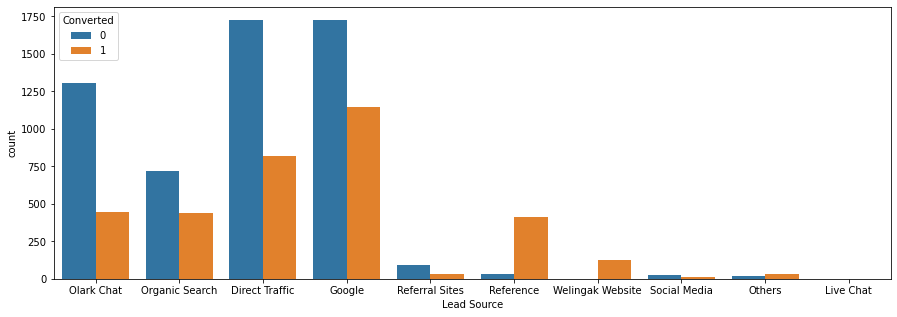

In [56]:
plt.figure(figsize=[15,5])
sns.countplot(leads_data['Lead Source'], hue=leads_data['Converted'])

# Google contributes most towards conversions

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

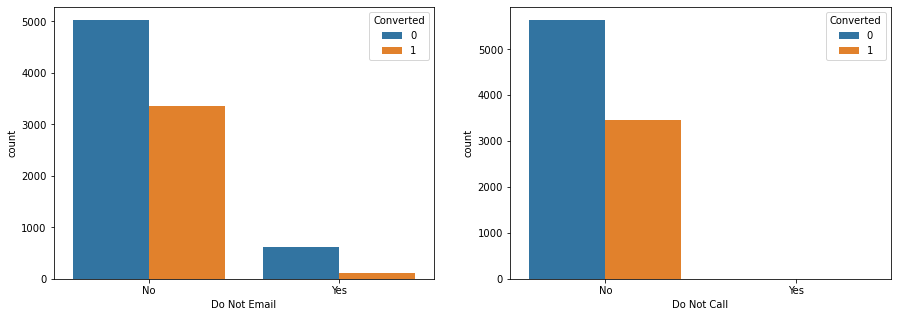

In [57]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(leads_data['Do Not Email'], hue=leads_data['Converted'])
plt.subplot(1,2,2)
sns.countplot(leads_data['Do Not Call'], hue=leads_data['Converted'])

In [58]:
leads_data['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.756783
SMS Sent                        30.077996
Olark Chat Conversation         10.677799
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.427442
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      0.988685
Unsubscribed                     0.670109
Had a Phone Conversation         0.274635
View in browser link Clicked     0.065912
Approached upfront               0.054927
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: Last Activity, dtype: float64

In [59]:
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation',
                                                     'View in browser link Clicked','Approached upfront',
                                                     'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                    'Resubscribed to emails'] ,'Others') 

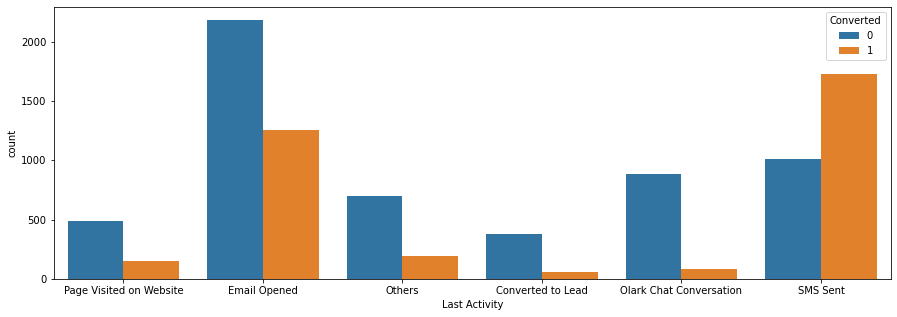

In [60]:
plt.figure(figsize=[15,5])
sns.countplot(leads_data['Last Activity'], hue=leads_data['Converted'])
plt.show()

In [61]:
# Max conversions have been through SMS Sent and Email Opened

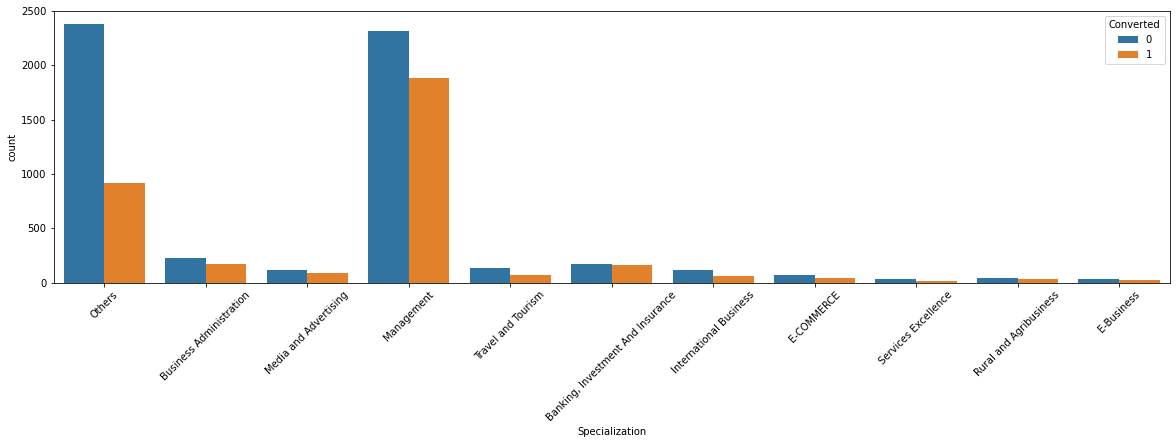

In [62]:
plt.figure(figsize=[20,5])
sns.countplot(leads_data['Specialization'], hue=leads_data['Converted'])
plt.xticks(rotation=45)
plt.show()

In [63]:
# Maximum conversions are for Management

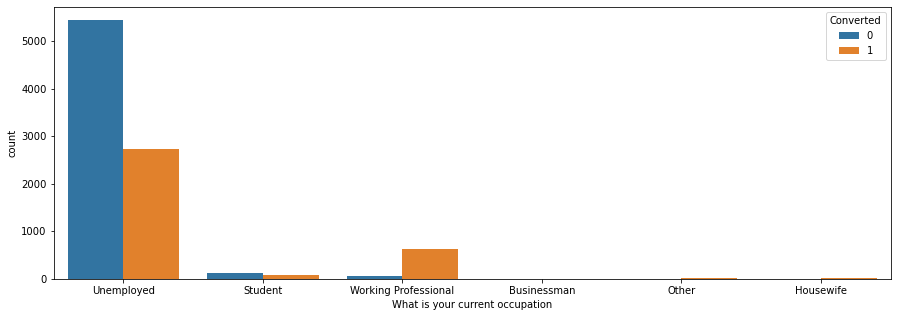

In [64]:
plt.figure(figsize=[15,5])
sns.countplot(leads_data['What is your current occupation'], hue=leads_data['Converted'])
plt.show()

In [65]:
# Maximum conversions are for Unemployed

In [66]:
leads_data['Search'].value_counts(normalize=True)*100

No     99.846205
Yes     0.153795
Name: Search, dtype: float64

In [67]:
leads_data['Newspaper Article'].value_counts(normalize=True)*100

No     99.978029
Yes     0.021971
Name: Newspaper Article, dtype: float64

In [68]:
leads_data['X Education Forums'].value_counts(normalize=True)*100

No     99.989015
Yes     0.010985
Name: X Education Forums, dtype: float64

In [69]:
leads_data['Newspaper'].value_counts(normalize=True)*100

No     99.989015
Yes     0.010985
Name: Newspaper, dtype: float64

In [70]:
leads_data['Digital Advertisement'].value_counts(normalize=True)*100

No     99.956058
Yes     0.043942
Name: Digital Advertisement, dtype: float64

In [71]:
leads_data['Through Recommendations'].value_counts(normalize=True)*100

No     99.923102
Yes     0.076898
Name: Through Recommendations, dtype: float64

In [72]:
leads_data['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [73]:
leads_data['Update me on Supply Chain Content'].value_counts(normalize=True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [74]:
leads_data['Get updates on DM Content'].value_counts(normalize=True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [75]:
leads_data['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [76]:
## All above colums should be dropped since there is a lot of imbalance

In [77]:
leads_data.drop(['Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                'I agree to pay the amount through cheque'], axis =1, inplace=True)

In [78]:
leads_data.shape # 16 columns left

(9103, 16)

In [79]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
leads_data['Tags'].value_counts(normalize=True)*100

Not Specified                                        36.614303
Will revert after reading the email                  22.355267
Ringing                                              13.061628
Interested in other courses                           5.591563
Already a student                                     5.108206
Closed by Horizzon                                    3.306602
switched off                                          2.636493
Busy                                                  2.032297
Lost to EINS                                          1.900472
Not doing further education                           1.592881
Interested  in full time MBA                          1.274305
Graduation in progress                                1.219378
invalid number                                        0.911787
Diploma holder (Not Eligible)                         0.692080
wrong number given                                    0.516313
opp hangup                                            0

In [81]:
leads_data['Tags'] = leads_data['Tags'].replace(['Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given',
                                                 'opp hangup','number not provided','in touch with EINS',
                                                     'Lost to Others','Still Thinking',
                                                     'Want to take admission but has financial problems',
                                                 'In confusion whether part time or DLP','Interested in Next batch',
                                                    'Lateral student','Shall take in the next coming month',
                                                'University not recognized','Recognition issue (DEC approval)'] ,'Others') 

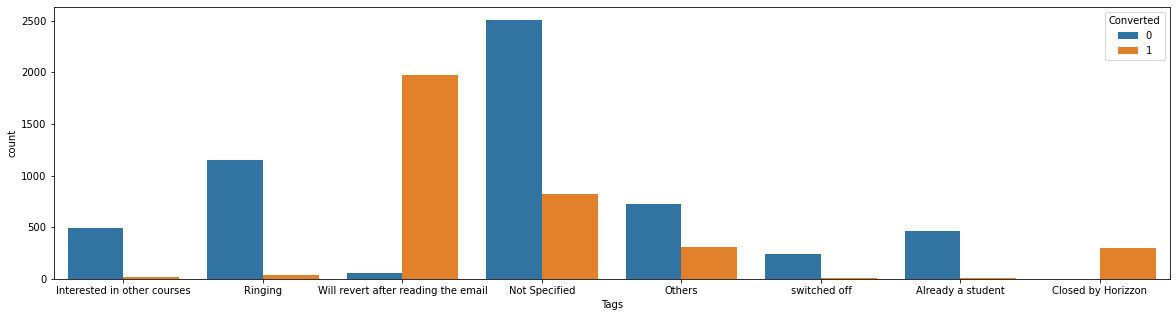

In [82]:
plt.figure(figsize=[20,5])
sns.countplot(leads_data['Tags'], hue=leads_data['Converted'])
plt.show()

In [83]:
# Will revert After Reading the email are maximum conversions

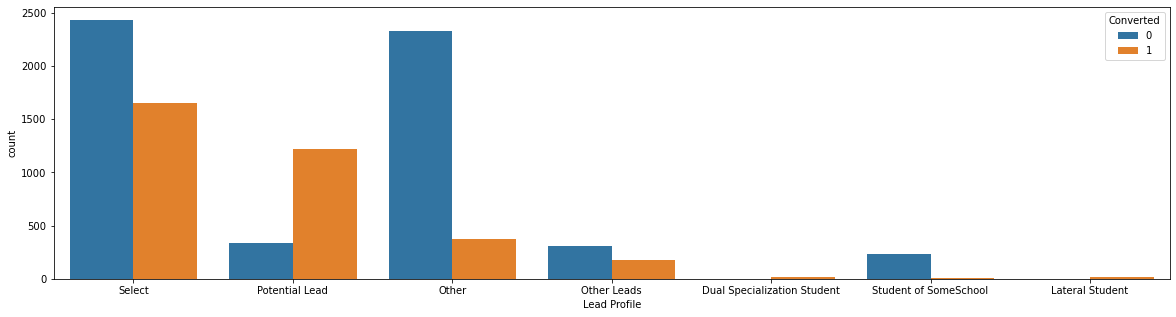

In [84]:
plt.figure(figsize=[20,5])
sns.countplot(leads_data['Lead Profile'], hue=leads_data['Converted'])
plt.show()

In [85]:
# Nothing major coming out of this

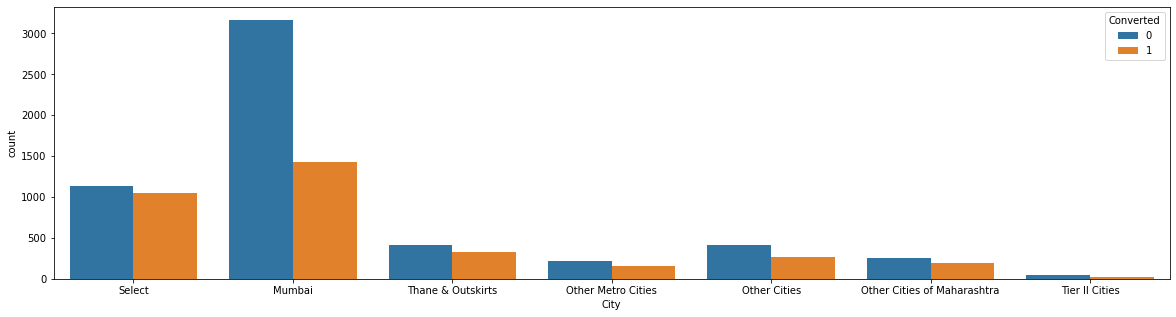

In [86]:
plt.figure(figsize=[20,5])
sns.countplot(leads_data['City'], hue=leads_data['Converted'])
plt.show()

In [87]:
# Mumbai is maximum conversions

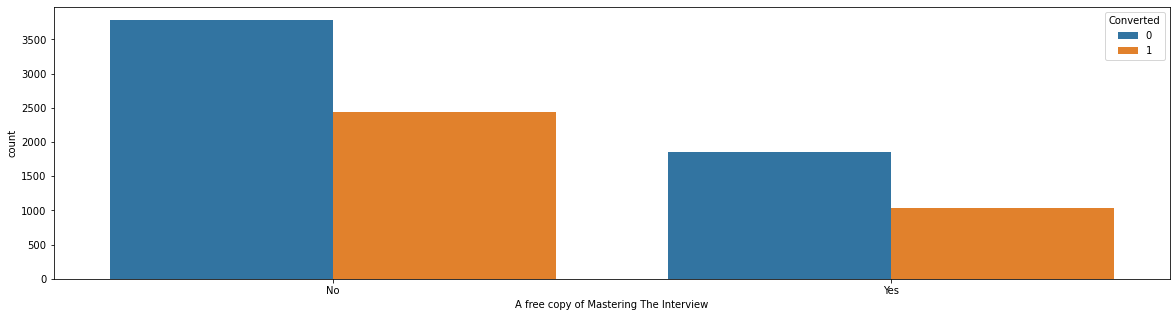

In [88]:
plt.figure(figsize=[20,5])
sns.countplot(leads_data['A free copy of Mastering The Interview'], hue=leads_data['Converted'])
plt.show()

In [89]:
leads_data['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        35.922223
Email Opened                    31.055696
SMS Sent                        23.860266
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.900472
Email Bounced                    0.659123
Unsubscribed                     0.516313
Unreachable                      0.351532
Had a Phone Conversation         0.153795
Email Marked Spam                0.021971
Approached upfront               0.010985
Resubscribed to emails           0.010985
View in browser link Clicked     0.010985
Form Submitted on Website        0.010985
Email Received                   0.010985
Name: Last Notable Activity, dtype: float64

In [90]:
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Page Visited on Website',
                                                                                   'Olark Chat Conversation','Email Link Clicked',
                                                                                   'Email Bounced','Unsubscribed','Unreachable',
                                                                                   'Had a Phone Conversation','Email Marked Spam',
                                                 'Approached upfront','Resubscribed to emails',
                                                 'View in browser link Clicked','Form Submitted on Website',
                                                     'Email Received'] ,'Others') 

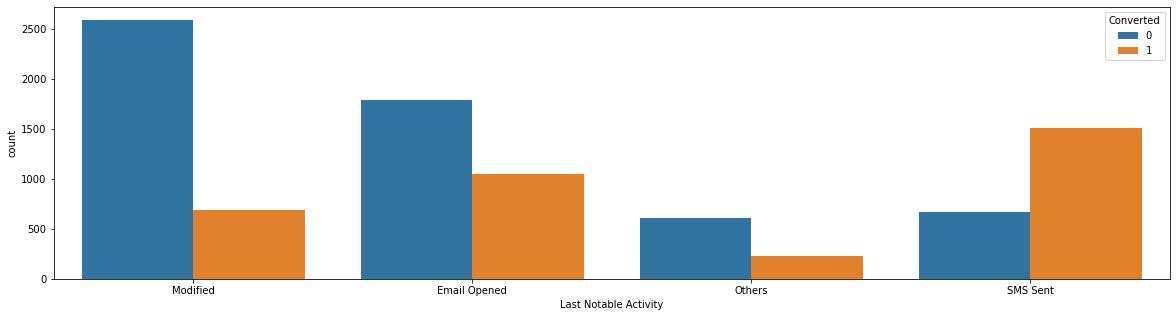

In [91]:
plt.figure(figsize=[20,5])
sns.countplot(leads_data['Last Notable Activity'], hue=leads_data['Converted'])
plt.show()

In [92]:
# Email Opened and SMS Sent have maximum conversions

<AxesSubplot:>

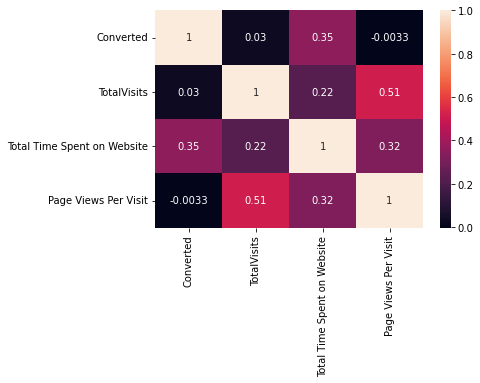

In [93]:
sns.heatmap(leads_data[['Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']].corr(),annot=True)

<AxesSubplot:xlabel='TotalVisits'>

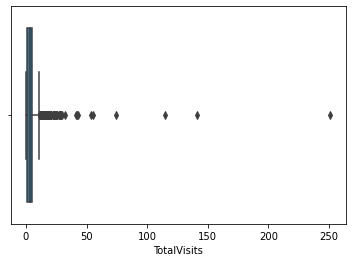

In [94]:
sns.boxplot(leads_data["TotalVisits"])

In [95]:
leads_data.TotalVisits.quantile([0.5, 0.7, 0.9, 0.95, 0.99])/1000

0.50    0.003
0.70    0.004
0.90    0.007
0.95    0.010
0.99    0.017
Name: TotalVisits, dtype: float64

In [96]:
leads_data.TotalVisits.describe()/1000

count    9.103000
mean     0.003445
std      0.004855
min      0.000000
25%      0.001000
50%      0.003000
75%      0.005000
max      0.251000
Name: TotalVisits, dtype: float64

In [97]:
# max seems to be an outlier so capping this at 75 percentile
upper_bound=leads_data["TotalVisits"].describe()["75%"]

In [98]:
## Capping
leads_data["TotalVisits"]=np.where(leads_data["TotalVisits"]>upper_bound,upper_bound,leads_data["TotalVisits"])

<AxesSubplot:xlabel='TotalVisits'>

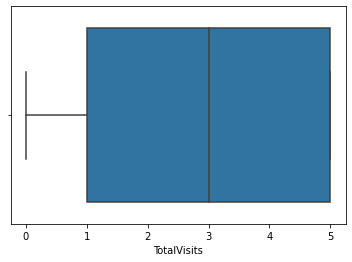

In [99]:
sns.boxplot(leads_data["TotalVisits"])

<AxesSubplot:xlabel='Total Time Spent on Website'>

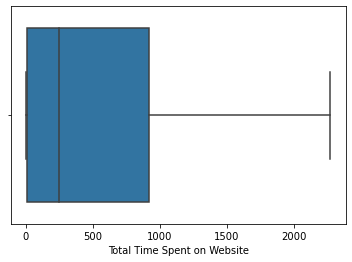

In [100]:
sns.boxplot(leads_data["Total Time Spent on Website"])

<AxesSubplot:xlabel='Page Views Per Visit'>

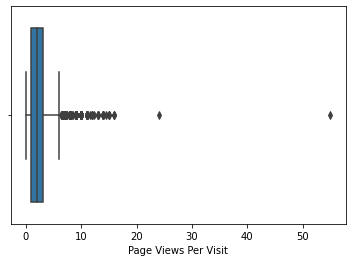

In [101]:
sns.boxplot(leads_data["Page Views Per Visit"])

In [102]:
leads_data["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [103]:
leads_data["Page Views Per Visit"].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    2.0
0.70    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [104]:
# Max seems to be an outlier so capping

In [105]:
q1=leads_data["Page Views Per Visit"].describe()["25%"]
q3=leads_data["Page Views Per Visit"].describe()["75%"]
iqr=q3-q1 #(Inter quartile range)
upper_bound_1=q3+1.5*iqr

In [106]:
## Capping
leads_data["Page Views Per Visit"]=np.where(leads_data["Page Views Per Visit"]>upper_bound,upper_bound,leads_data["Page Views Per Visit"])

<AxesSubplot:xlabel='Page Views Per Visit'>

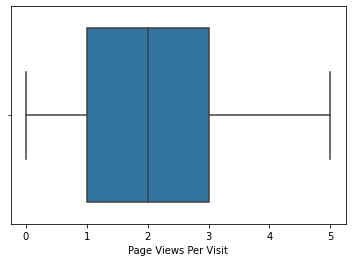

In [107]:
sns.boxplot(leads_data["Page Views Per Visit"])

# Step 4: Create Dummy Variable

In [108]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [109]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City', 'Last Notable Activity']], drop_first=True)

In [110]:
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [111]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,0,0,1,0,0,1,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,0,0,0,0,0,1,0,0


In [112]:
# Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [113]:
# We have created dummies for the below variables, so we can drop them
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City', 'Last Notable Activity','Do Not Email', 'Do Not Call','A free copy of Mastering The Interview'], 1)

# Step 5: Test-Train Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

# Putting response variable to y
y=leads_data['Converted']

In [116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7962,0.178561,1.476324,-0.415162,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5520,1.233536,-0.771066,1.684575,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1962,1.233536,-0.571257,0.184763,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1566,1.233536,1.393834,0.784688,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,-1.403902,-0.881052,-1.315049,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [120]:
### Checking the Conversion Rate
Conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Conversion

38.02043282434362

In [121]:
# 38% conversion rate

In [122]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 5   Lead Origin_Others                                    9103 non-null   uint8  
 6   Lead Source_Google                                    9103 non-null   uint8  
 7   Lead Source_Live Chat                                 9103 non-null   uint8  
 8   Lead Source_Olark Chat                                9103

# Step 7: Model Building

In [123]:
import statsmodels.api as sm

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [125]:
# Doing RFE to come down to 15 feautres
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [126]:
col = X_train.columns[rfe.support_]

In [127]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1391.5
Date:                Mon, 17 Oct 2022   Deviance:                       2783.0
Time:                        20:42:20   Pearson chi2:                 7.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.3097      0.338    -15.715      0.000      -5.972      -4.648
Total Time Spent on Website                  1.0826      0.057     18.946      0.000       0.971       1.195
Lead Origin_Others                           1.7142      0.325      5.275      0.000       1.077       2.351
Lead Source_Olark Chat                       1.1208      0.143      7.824      0.000       0.840       1.402
Lead Source_Welingak Website                 2.7320      0.795      3.438      0.001       1.174       4.290
Last Activity_Email Opened                   1.0909      0.128      8.552      0.000       0.841       1.341
Last Activity_SMS Sent                       1.4544      0.201      7.231      0.000       1.060       1.849
Tags_Closed by Horizzon                      8.6729      0.790     10.980      0.000       7.125      10.221
Tags_Not Specified                           3.8833      0.340     11.409      0.000       3.216       4.550
Tags_Others                                  2.9880      0.335      8.931      0.000       2.332       3.644
Tags_Ringing                                -0.7028      0.399     -1.761      0.078      -1.485       0.080
Tags_Will revert after reading the email     7.0187      0.364     19.258      0.000       6.304       7.733
Tags_switched off                           -0.9064      0.684     -1.325      0.185      -2.247       0.434
Lead Profile_Lateral Student                24.3009   1.16e+04      0.002      0.998   -2.27e+04    2.28e+04
Lead Profile_Other                          -1.8634      0.140    -13.349      0.000      -2.137      -1.590
Last Notable Activity_SMS Sent               1.3486      0.199      6.760      0.000       0.958       1.740
============================================================================================================
"""

In [128]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.888894
5520    0.112483
1962    0.004586
1566    0.986729
9170    0.017093
5097    0.115889
8954    0.032442
309     0.914351
5519    0.420720
1050    0.982140
dtype: float64

In [129]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88889352, 0.11248265, 0.00458579, 0.9867287 , 0.01709252,
       0.11588854, 0.03244171, 0.91435138, 0.42071972, 0.98213963])

In [130]:
# Creating a dataframe with the actual conversion value and the predicted probabilities

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.888894,7962
1,0,0.112483,5520
2,0,0.004586,1962
3,1,0.986729,1566
4,0,0.017093,9170


In [132]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.888894,7962,1
1,0,0.112483,5520,0
2,0,0.004586,1962,0
3,1,0.986729,1566,1
4,0,0.017093,9170,0


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9110169491525424


In [137]:
# Checking VIFs

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_SMS Sent,5.97
7,Tags_Not Specified,5.89
14,Last Notable Activity_SMS Sent,5.32
13,Lead Profile_Other,4.58
10,Tags_Will revert after reading the email,2.16
4,Last Activity_Email Opened,2.03
1,Lead Origin_Others,1.80
2,Lead Source_Olark Chat,1.56
0,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.41


In [140]:
# Let's drop Last Activity_SMS Sent

In [141]:
col = col.drop('Last Activity_SMS Sent', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Tags_Closed by Horizzon',
       'Tags_Not Specified', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Lateral Student', 'Lead Profile_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [142]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.2
Date:                Mon, 17 Oct 2022   Deviance:                       2832.4
Time:                        20:42:20   Pearson chi2:                 7.62e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0231      0.331    -15.181      0.000      -5.672      -4.375
Total Time Spent on Website                  1.0839      0.057     19.093      0.000       0.973       1.195
Lead Origin_Others                           1.9768      0.329      6.017      0.000       1.333       2.621
Lead Source_Olark Chat                       1.0330      0.140      7.361      0.000       0.758       1.308
Lead Source_Welingak Website                 2.7443      0.799      3.436      0.001       1.179       4.310
Last Activity_Email Opened                   0.7740      0.115      6.739      0.000       0.549       0.999
Tags_Closed by Horizzon                      8.5755      0.787     10.897      0.000       7.033      10.118
Tags_Not Specified                           3.8939      0.338     11.506      0.000       3.231       4.557
Tags_Others                                  3.0285      0.332      9.111      0.000       2.377       3.680
Tags_Ringing                                -0.6582      0.398     -1.653      0.098      -1.439       0.122
Tags_Will revert after reading the email     6.9901      0.361     19.353      0.000       6.282       7.698
Tags_switched off                           -0.8302      0.683     -1.216      0.224      -2.168       0.508
Lead Profile_Lateral Student                24.3728   1.18e+04      0.002      0.998   -2.32e+04    2.32e+04
Lead Profile_Other                          -1.7906      0.137    -13.073      0.000      -2.059      -1.522
Last Notable Activity_SMS Sent               2.4728      0.137     18.097      0.000       2.205       2.741
============================================================================================================
"""

In [143]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Converted_Prob'] = y_train_pred

In [144]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.888789,7962,1
1,0,0.113414,5520,0
2,0,0.001543,1962,0
3,1,0.985961,1566,1
4,0,0.015201,9170,0


In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9111738857501569


In [146]:
# Accuracy hasn't dropped so let's check VIFs again

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Not Specified,5.76
12,Lead Profile_Other,4.58
9,Tags_Will revert after reading the email,2.04
13,Last Notable Activity_SMS Sent,1.97
4,Last Activity_Email Opened,1.89
1,Lead Origin_Others,1.80
2,Lead Source_Olark Chat,1.55
0,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.41
8,Tags_Ringing,1.34


In [148]:
# Let's drop Tags_Not Specified and Lead Profile_Lateral Student (Basis pvalue)

In [149]:
col = col.drop(['Tags_Not Specified','Lead Profile_Lateral Student'], 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1554.5
Date:                Mon, 17 Oct 2022   Deviance:                       3109.0
Time:                        20:42:20   Pearson chi2:                 8.18e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4759      0.122    -20.311      0.000      -2.715      -2.237
Total Time Spent on Website                  1.0649      0.053     20.017      0.000       0.961       1.169
Lead Origin_Others                           2.1165      0.313      6.765      0.000       1.503       2.730
Lead Source_Olark Chat                       1.1970      0.133      9.012      0.000       0.937       1.457
Lead Source_Welingak Website                 3.6704      0.790      4.646      0.000       2.122       5.219
Last Activity_Email Opened                   0.8737      0.109      8.005      0.000       0.660       1.088
Tags_Closed by Horizzon                      5.9485      0.724      8.214      0.000       4.529       7.368
Tags_Others                                  0.2793      0.127      2.197      0.028       0.030       0.528
Tags_Ringing                                -3.5479      0.255    -13.892      0.000      -4.048      -3.047
Tags_Will revert after reading the email     4.3334      0.191     22.737      0.000       3.960       4.707
Tags_switched off                           -3.7027      0.611     -6.059      0.000      -4.900      -2.505
Lead Profile_Other                          -0.6832      0.114     -6.016      0.000      -0.906      -0.461
Last Notable Activity_SMS Sent               2.8813      0.132     21.842      0.000       2.623       3.140
============================================================================================================
"""

In [150]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Converted_Prob'] = y_train_pred

In [151]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.905237,7962,1
1,0,0.104897,5520,0
2,0,0.001127,1962,0
3,1,0.985449,1566,1
4,0,0.206957,9170,0


In [152]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9016007532956686


In [153]:
# Accuracy hasn't dropped so let's check VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.85
1,Lead Origin_Others,1.79
11,Last Notable Activity_SMS Sent,1.75
4,Last Activity_Email Opened,1.69
2,Lead Source_Olark Chat,1.45
0,Total Time Spent on Website,1.43
10,Lead Profile_Other,1.39
3,Lead Source_Welingak Website,1.33
7,Tags_Ringing,1.28
5,Tags_Closed by Horizzon,1.20


In [154]:
# Now the model 3 seems fine

# Metrics Analysis

In [157]:
from sklearn import metrics

In [159]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3760,  193],
       [ 434, 1985]], dtype=int64)

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Let's see the sensitivity -- Number of positives predicted out of total positives
TP / float(TP+FN) 

0.8205870194295163

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.9511763217809259

In [165]:
# Calculate false postive rate - predicting converted when customer hasn't converted
print(FP/ float(TN+FP))

0.04882367821907412


In [166]:
# positive predictive value 
print (TP / float(TP+FP))

0.911386593204775


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8965188364329996


#  Plotting the ROC Curve

In [169]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

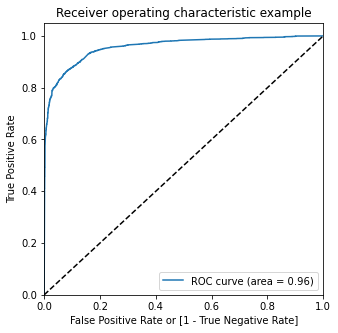

In [171]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point

In [172]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.905237,7962,1,1,1,1,1,1,1,1,1,1,1
1,0,0.104897,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.001127,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.985449,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.206957,9170,0,1,1,1,0,0,0,0,0,0,0


In [173]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.800063  0.965688  0.698710
0.2   0.2  0.875549  0.931790  0.841133
0.3   0.3  0.892655  0.877635  0.901847
0.4   0.4  0.898933  0.853659  0.926638
0.5   0.5  0.901601  0.820587  0.951176
0.6   0.6  0.903013  0.798677  0.966861
0.7   0.7  0.894852  0.760232  0.977232
0.8   0.8  0.885122  0.721786  0.985075
0.9   0.9  0.864407  0.656883  0.991399


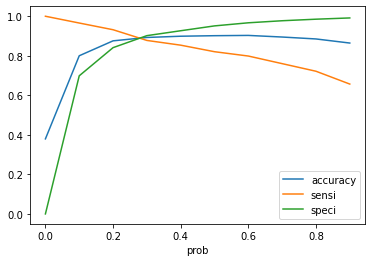

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [175]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.905237,7962,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.104897,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.001127,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.985449,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.206957,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8926553672316384

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8205870194295163

In [179]:
# Let us calculate specificity
TN / float(TN+FP)

0.9511763217809259

# Precision and Recall

In [180]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3760,  193],
       [ 434, 1985]], dtype=int64)

In [181]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.911386593204775

In [182]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8205870194295163

In [183]:
from sklearn.metrics import precision_recall_curve

In [184]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [186]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

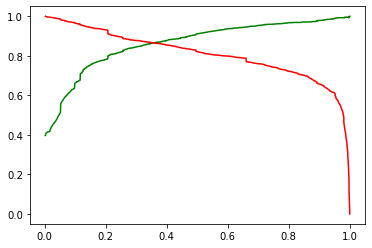

In [187]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Predictions on the Test Set

In [188]:
X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

In [192]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

In [193]:
# Let's see the head
y_pred_1.head()

,0
3504,0.005165
4050,0.997314
7201,0.757008
1196,0.005155
8219,0.065825


In [194]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [195]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [196]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [198]:
y_pred_final.head()

,Converted,CustID,0
0,0,3504,0.005165
1,1,4050,0.997314
2,0,7201,0.757008
3,0,1196,0.005155
4,1,8219,0.065825


In [199]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [201]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [202]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,final_predicted
0,0,3504,0.005165,0
1,1,4050,0.997314,1
2,0,7201,0.757008,1
3,0,1196,0.005155,0
4,1,8219,0.065825,0


In [203]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9110216038081289

In [205]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1595,   94],
       [ 149,  893]], dtype=int64)

In [206]:
# Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.9047619047619048

In [207]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8570057581573897